## sklearn Basics
## Part 1

## Who and why created sklearn?

Scikit-learn was initially developed by David Cournapeau as a Google Summer of Code project in 2007. Later that year, Matthieu Brucher joined the project and started to use it as a part of his thesis work.

Scikit-Learn, also known as sklearn is a python library to implement machine learning models and statistical modelling. Through scikit-learn, we can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models.

<h3>Basic model</h3>
<div>
<img src="images/simple_model.png" width="450", style="margin-left: 5px"/>
</div>

<pre>
    X - everything that we using to make a prediction
    y - prediction that we interested in making
</pre>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
X, y = fetch_california_housing(return_X_y=True)

In [3]:
model = KNeighborsRegressor()
#model = LinearRegression()
fetch_california_housing(as_frame=True)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
 ...       ...       ...       ...        ...         ...       ...       ...        ...
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
 20639  2.388

In [4]:
model.fit(X, y)

KNeighborsRegressor()

In [5]:
pred = model.predict(X)

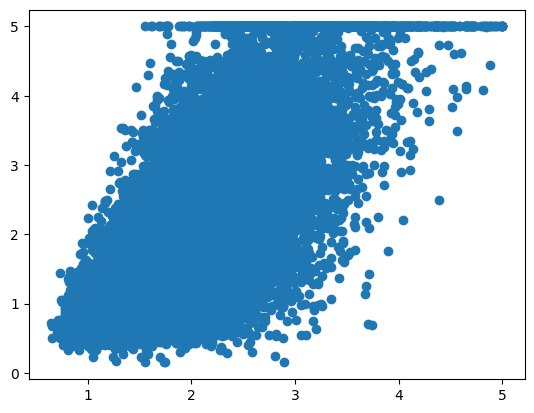

In [6]:
plt.scatter(pred, y)

## Model prediction using KNeighborsRegressor

<div>
<img src="images/KNeighborsRegressor.png" width="450", style="margin-left: 5px"/>
</div>

## Model v2

<div>
<img src="images/model_v2.png" width="550", style="margin-left: 5px"/>
</div>

In [7]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model_v2", KNeighborsRegressor(n_neighbors=10))
])


In [8]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model_v2', KNeighborsRegressor(n_neighbors=10))])

In [9]:
pred_v2 = pipe.predict(X)

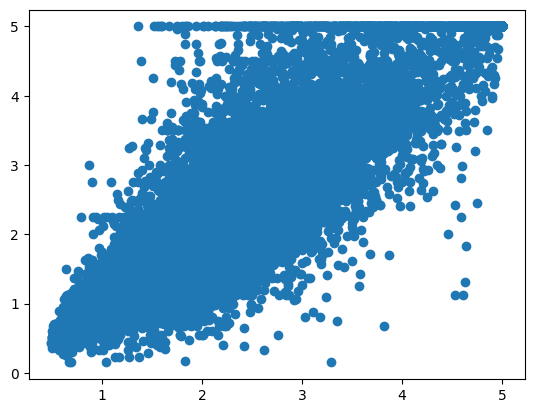

In [10]:
plt.scatter(pred_v2, y)

## Model V3

<div>
<img src="images/model_v3.png" width="750", style="margin-left: 5px"/>
</div>

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
pipe_v3 = Pipeline([
    ("scale", StandardScaler()),
    ("model_v2", KNeighborsRegressor(n_neighbors=5))
])

In [13]:
model_v3 = GridSearchCV(estimator=pipe_v3,
             param_grid={'model_v2__n_neighbors': range(1,11)},
             cv=3)

In [14]:
model_v3.fit(X, y);
pd.DataFrame(model_v3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model_v2__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011262,0.000342,0.239390,0.017624,1,{'model_v2__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.011061,0.000102,0.269592,0.021129,2,{'model_v2__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.011144,0.000062,0.290790,0.022412,3,{'model_v2__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.011134,0.000064,0.312455,0.035639,4,{'model_v2__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.011125,0.000216,0.318160,0.024536,5,{'model_v2__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.011230,0.000176,0.328939,0.024007,6,{'model_v2__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.011038,0.000139,0.338635,0.025924,7,{'model_v2__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.011119,0.000098,0.344962,0.024974,8,{'model_v2__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.011098,0.000075,0.355741,0.024887,9,{'model_v2__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.011578,0.000316,0.367529,0.027355,10,{'model_v2__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


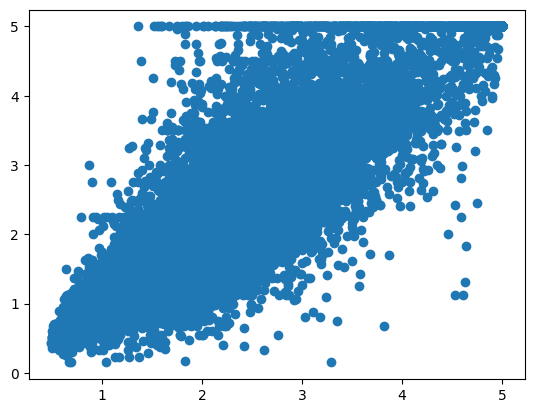

In [15]:
plt.scatter(model_v3.predict(X), y)

## Preprocessing
### About Transforming (or scaling) Data

In [16]:
df = pd.read_csv("drawndata1.csv")

In [17]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [18]:
X_atd = df[['x', 'y']].values
y_atd = df['z'] == "a"

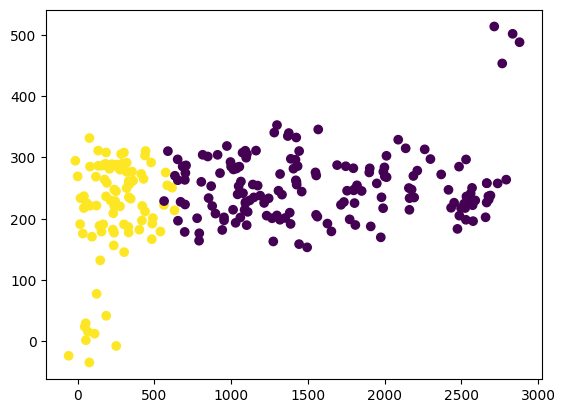

In [19]:
plt.scatter(X_atd[:, 0], X_atd[:, 1], c=y_atd)

## Need to fix:

1. Two groups of outliers
2. Different scales between x and y axeces

<div>
<img src="images/example_atd_1.png" width="550", style="margin-left: 5px"/>
</div>

<pre>
Standart scaler <strong>can't</strong> deal with these points.

One of the possible ways is quantilez:
    
</pre>

<div>
<img src="images/quantile_transformer.png" width="650", style="margin-left: 5px"/>
</div>

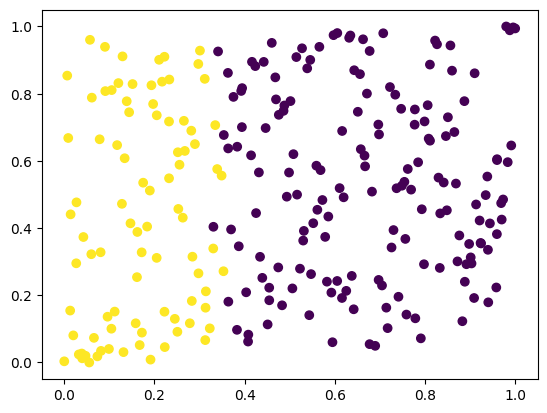

In [20]:
from sklearn.preprocessing import  StandardScaler, QuantileTransformer
X_atd_new = QuantileTransformer(n_quantiles=100).fit_transform(X_atd)
plt.scatter(X_atd_new[:, 0], X_atd_new[:, 1], c=y_atd)

In [21]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X_atd, y_atd).predict(X_atd)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X_atd[:, 0], X_atd[:, 1], c=y_atd)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X_atd)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y_atd)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X_atd[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X_atd[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

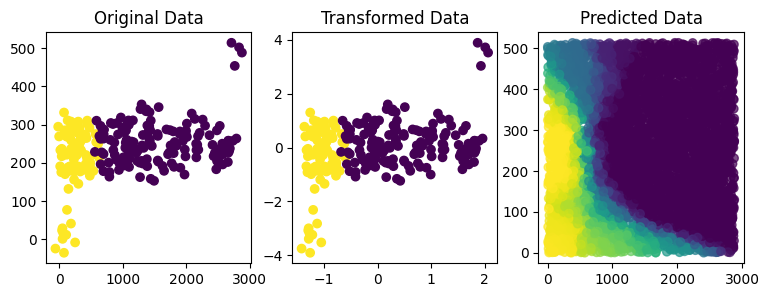

In [22]:
plot_output(scaler=StandardScaler())

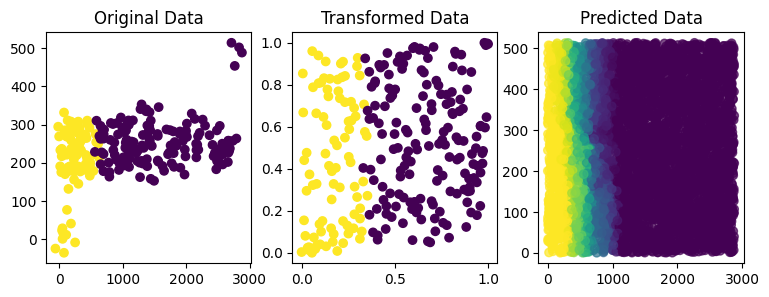

In [23]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

## Invert text data to numeric data

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
arr = np.array(["low", "low", "high", "ultra", "medium"]).reshape(-1, 1)

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

#This is an y array

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [26]:
#If we wont to get label that we didn't have in array
#We need to set handle_unknown='ignore'
#useful when generating X, but do not use when generating y
enc.transform([["zero"],["low"]])

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.]])

## Metrics

<div>
<img src="images/metrics.png" width="1100", style="margin-left: 5px"/>
</div>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df  = pd.read_csv("creditcard_s.csv")
df.head(5)


,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
X_m = df.drop(columns=['Time', 'Amount', 'Class']).values
y_m = df['Class'].values
f"Shapes of X={X_m.shape} y={y_m.shape}, #Fraud Cases={y_m.sum()}"

'Shapes of X=(80000, 29) y=(80000,), #Fraud Cases=196'

In [29]:
from sklearn.linear_model import LogisticRegression
#add class weight
#        weight
#Class 0:  1   non froad 
#Class 1:  2   froad 
model_m = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1800)
model_m.fit(X_m, y_m).predict(X_m).sum()

171

## GridSearch and Metrics

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=3000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='precision', #select the best model based on one of these scores need to mention which score it has to optimize over using refit
    return_train_score=True,
    cv=4,
    n_jobs=-1
)

grid.fit(X_m, y_m)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=3000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')})

In [31]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,mean_train_recall_score,std_train_recall_score
0,34.708153,4.673259,0.011474,0.003536,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.009443,1.0,0.952381,1.000000,...,0.102041,0.556122,0.355646,3,0.863946,0.585034,0.530612,0.673469,0.663265,0.126584
1,34.385825,2.746958,0.012867,0.003104,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.007278,1.0,0.955556,1.000000,...,0.122449,0.576531,0.361165,2,0.870748,0.673469,0.625850,0.782313,0.738095,0.095299
2,36.615407,2.664491,0.010032,0.002775,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.006732,1.0,0.914894,0.833333,...,0.204082,0.602041,0.332377,1,0.870748,0.707483,0.687075,0.816327,0.770408,0.075962


In [32]:
#precision_score - given that I predict fraud how accure am I
#recall_score - did I get all the fraud cases?

#Extreme examples: 

#Let's predict that every single case is a fraud case, then
#precision_score - going to be very low
#recall_score - going to be very hight

#Supose we find fraud cantidate, but no body else gets predicted as fraud, then
#precision_score - going to be very hight
#recall_score - going to be very low

#We need to optimise these two values
#And when we do it we need to think:
#Do we care more about false_positives or false_negatives

print("predict: ", grid.predict(X_m).sum())
print("recall_score: ", recall_score(y_m, grid.predict(X_m)))
print("precision_score: ", precision_score(y_m, grid.predict(X_m)))

predict:  171
recall_score:  0.6938775510204082
precision_score:  0.7953216374269005


In [33]:
#grid_v2 = GridSearchCV(
#    estimator=LogisticRegression(max_iter=1000),
#    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
#    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
#    refit='precision', #select the best model based on one of these scores need to mention which score it has to optimize over using refit
#    return_train_score=True,
#    cv=10,#
#    n_jobs=-1
#)

#grid_v2.fit(X_m, y_m)



## Part 2

### Types of Neural Network

- Classification - identifying which category an object belongs to.

- Regression - predicting a continuous-valued attribute associated with an object.

- Clustering - automatic grouping of similar objects into sets.

### Tools & Features:

- Dimensionality reduction - reducing the number of random variables to consider.

- Model selection - comparing, validating and choosing parameters and models.

- Preprocessing - feature extraction and normalization.

### Classification

In [114]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
iris = datasets.load_iris()

### Our data

In [44]:
pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Input features

In [62]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Output features

In [49]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Assign X and Y veriables

In [52]:
X = iris.data
Y = iris.target

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


### Build and train Classification Model using Random Forest

In [53]:
clf = RandomForestClassifier()

In [55]:
clf.fit(X, Y)

RandomForestClassifier()

### Features importance

In [110]:
features_importance = np.array([[iris.feature_names]
                               ,[clf.feature_importances_]]).T
print(features_importance)

[[['sepal length (cm)' '0.07564470004235717']]

 [['sepal width (cm)' '0.019801801593828165']]

 [['petal length (cm)' '0.43546221289916043']]

 [['petal width (cm)' '0.46909128546465434']]]


In [111]:
print(clf.predict(X[[0]]))

[0]


In [112]:
#To which class the current element hase been classified
print(clf.predict_proba(X[[0]]))

[[1. 0. 0.]]


### Data Split (ratio 80/20)

80% - train <br>
20% - predict

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### Train with splitted data

In [116]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [121]:
print(clf.predict([X[0]]))

[0]


In [122]:
print(clf.predict_proba([X[0]]))

[[1. 0. 0.]]


In [132]:
relust = clf.predict(X_test)

In [124]:
print(Y_test)

[2 2 1 2 0 1 0 1 0 0 1 1 1 0 2 2 0 0 1 2 0 2 1 1 1 0 1 0 2 0]


In [126]:
print(clf.score(X_test, Y_test))

0.9333333333333333


In [163]:
print(np.array([[Y_test], [relust]]))

[[[2 2 1 2 0 1 0 1 0 0 1 1 1 0 2 2 0 0 1 2 0 2 1 1 1 0 1 0 2 0]]

 [[2 2 2 2 0 1 0 1 0 0 1 1 2 0 2 2 0 0 1 2 0 2 1 1 1 0 1 0 2 0]]]
